In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.metrics import accuracy_score

### 보스턴 집값 프로젝트  :  집값이 평균이상이면1 이하이면0인 2진 분류로 진행
#### 데이터 읽고 Binary label 추가

In [2]:
df_bos = pd.read_excel('boston_house_data.xlsx', encoding='utf-8')
df_bos_y = pd.read_excel('boston_house_target.xlsx',encoding='utf-8')
del df_bos_y['Unnamed: 0']
del df_bos['Unnamed: 0']
# 집값평균
mean = df_bos_y[0].mean()
print(mean)

22.532806324110677


In [3]:
df_bos_y['Label'] = df_bos_y[0].apply(lambda x: 1 if x > mean else 0)
df_bos_y.head()

,0,Label
0,24.0,1
1,21.6,0
2,34.7,1
3,33.4,1
4,36.2,1


In [4]:
ndarr_bos = np.array(df_bos)
ndarr_bos_y = np.array(df_bos_y['Label'])

#### 집값 평균과 관계한 특징 설정(건축년도,크기,방수) , 테스트 트레이닝 set 설정

In [5]:
bos_X = ndarr_bos[:,(1,5,6)] ## 1: 25000평방비트초과 비율 5:주택당 방수 6:1940 이전 건축 여부
bos_Y = ndarr_bos_y
x_train, x_test, y_train, y_test = model_selection.train_test_split(bos_X,bos_Y,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 3)
(152, 3)
(354,)
(152,)


#### 모델 학습

In [6]:
model = linear_model.LogisticRegression() # 로지스틱 회귀
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### 모델 테스트

In [7]:
predict_test = model.predict_proba(x_test) # probability
print('정확도', accuracy_score(model.predict(x_test),y_test)) # 테스트셋으로 정확도 확인

정확도 0.8552631578947368


#### ROC Curve 시각화

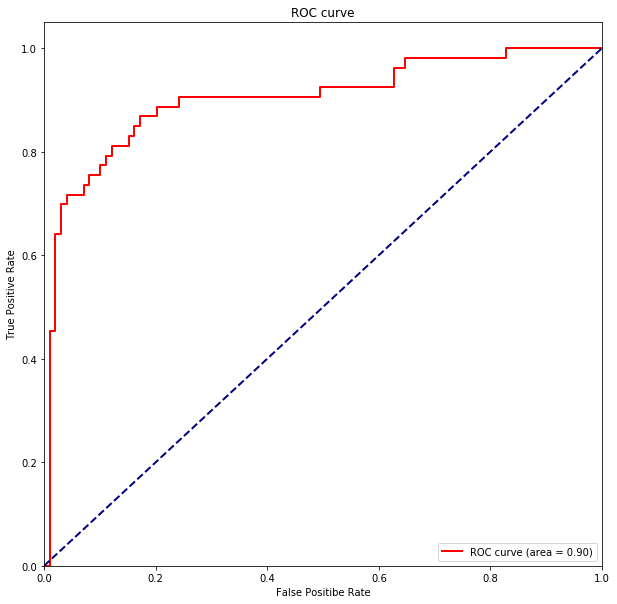

In [8]:
## ROC Curve = 중요한 정보의 에러 확률 나타낸것
## ex) x=0 y=0.7 = 에러가 0번일어날 확률은 70%이다.
from sklearn.metrics import roc_curve, auc

fpr, tpr, _= roc_curve(y_true=y_test, y_score=predict_test[:,1])
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='red',lw=2,label='ROC curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positibe Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC curve')
plt.show()